<a href="https://colab.research.google.com/github/Shreya-3702/DSBDAL/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform the following operations using Python on Heart Diseases data sets
a. Data cleaning(Remove NA, ?, Negative values etc.)
b. Error correcting(Outlier detection and removal)
c. Data transformation
d. Build Data model using regression and kNN methods and compare accuracy of
heart disease prediction.

In [321]:
import pandas as pd
import numpy as np

In [322]:
df = pd.read_csv('Cleavland.csv',header = None)

In [323]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df.columns = column_names

In [324]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [325]:
df.shape

(303, 14)

**a. Data cleaning(Remove NA, ?, Negative values etc.)**

In [326]:
(df == '?').sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [327]:
df = df.replace('?', np.nan)

In [328]:
(df == '?').sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [329]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [330]:
df = df.dropna()
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [331]:
df.shape

(297, 14)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [333]:
df['ca'].unique()

array(['0', '3', '2', '1'], dtype=object)

In [334]:
df['thal'].unique()

array(['6', '3', '7'], dtype=object)

In [335]:
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  num       297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [337]:
(df < 0).sum()   #No negative values in each column

# df = df[df >= 0]
# df.head()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**b. Error correcting(Outlier detection and removal)**


In [338]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [339]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Values')

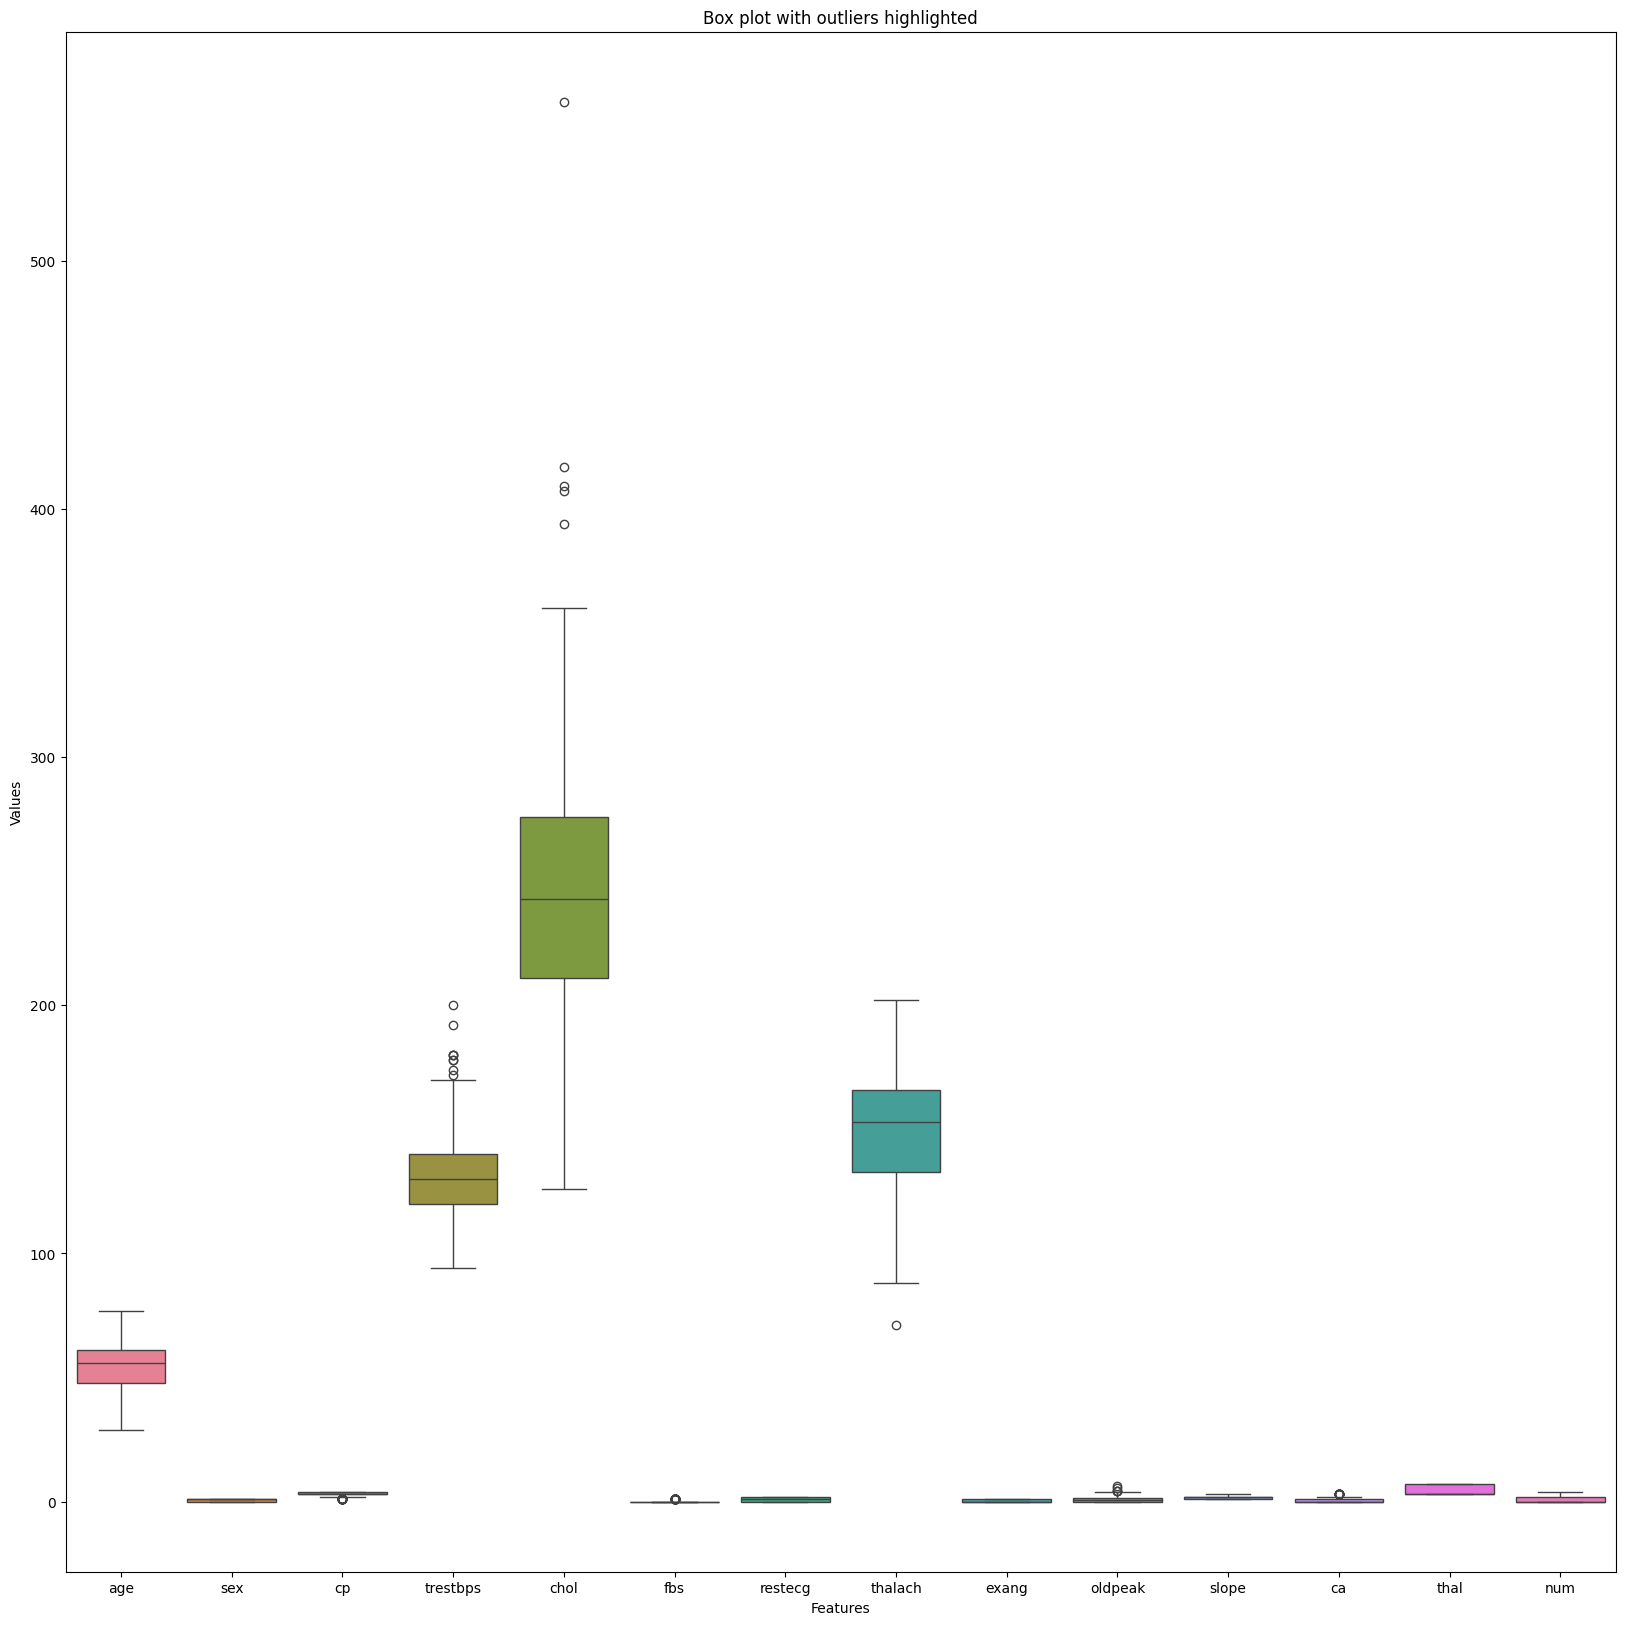

In [341]:
plt.figure(figsize=(20,20))
sns.boxplot(df)
plt.title('Box plot with outliers highlighted')
plt.xlabel('Features')
plt.ylabel('Values')

In [342]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("Q1 = " , Q1)
print("Q3 = " , Q3)
print("lower_limit = " ,lower_limit)
print("upper_limit = " , upper_limit)

Q1 =  120.0
Q3 =  140.0
lower_limit =  90.0
upper_limit =  170.0


In [343]:
outliers = (df['trestbps'] < lower_limit) | (df['trestbps'] > upper_limit)
df[outliers]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
14,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
83,68,1,3,180,274,1,2,150,1,1.6,2,0,7,3
126,56,0,4,200,288,1,2,133,1,4.0,3,2,7,3
172,59,0,4,174,249,0,0,143,1,0.0,2,0,3,1
183,59,1,1,178,270,0,2,145,0,4.2,3,0,7,0
188,54,1,2,192,283,0,2,195,0,0.0,1,1,7,1
201,64,0,4,180,325,0,0,154,1,0.0,1,0,3,0
213,66,0,4,178,228,1,0,165,1,1.0,2,2,7,3
231,55,0,4,180,327,0,1,117,1,3.4,2,0,3,2


In [344]:
# df = df[(df['trestbps'] >= lower_limit) & (df['trestbps'] <= upper_limit)]

df = df[~outliers]  #Removal of outliers using trimming method
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [345]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Text(0, 0.5, 'Values')

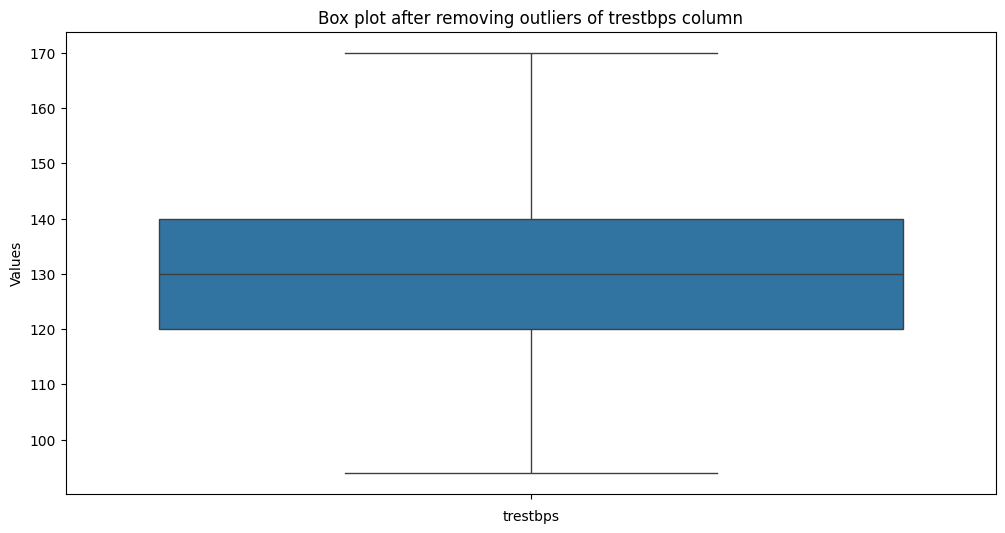

In [346]:
plt.figure(figsize=(12,6))
sns.boxplot(df['trestbps'])
plt.title('Box plot after removing outliers of trestbps column')
plt.xlabel('trestbps')
plt.ylabel('Values')

**c. Data transformation**

In [347]:
df.loc[df['sex'] == 1,'sex'] = 'M'
df.loc[df['sex'] == 0,'sex'] = 'F'
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,M,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,M,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,M,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,M,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,F,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,F,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,M,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,M,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,M,4,130,131,0,0,115,1,1.2,2,1,7,3


In [348]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


**d. Build Data model using regression and kNN methods and compare accuracy of
heart disease prediction.**

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [350]:
X = df.iloc[:,:13]
Y = df['num']

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7


In [351]:
Y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: num, Length: 288, dtype: int64

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [353]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_predictions = regression_model.predict(X_test)
regression_mse = mean_squared_error(y_test, regression_predictions)
# regression_accuracy = accuracy_score(y_test,y_pred)

In [354]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [355]:
print("Linear Regression - Mean Squared Error (MSE):", regression_mse)
print("kNN - Mean Squared Error (MSE):", knn_mse)
print("kNN Classifier - Accuracy Score:", knn_accuracy)

Linear Regression - Mean Squared Error (MSE): 0.8021720504201297
kNN - Mean Squared Error (MSE): 2.913793103448276
kNN Classifier - Accuracy Score: 0.41379310344827586
